# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [100]:
!pip install citipy

In [101]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [102]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [103]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | nishinoomote
Processing Record 4 of Set 1 | himatnagar
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | st. john's
Processing Record 7 of Set 1 | paracuru
Processing Record 8 of Set 1 | port mathurin
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | praia
Processing Record 11 of Set 1 | bangassou
Processing Record 12 of Set 1 | blackmans bay
Processing Record 13 of Set 1 | talnakh
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | bandar-e genaveh
Processing Record 16 of Set 1 | noordwijkerhout
Processing Record 17 of Set 1 | bilibino
Processing Record 18 of Set 1 | salsomaggiore terme
Processing Record 19 of Set 1 | waitangi
Processing Record 20 of Set 1 | ribeira grande
Processing Record 21 of Set 1 | puerto ayora
Processing Record 22 of Set 1 | saip

Processing Record 38 of Set 4 | shar
Processing Record 39 of Set 4 | wingham
Processing Record 40 of Set 4 | picos
Processing Record 41 of Set 4 | fuvahmulah
City not found. Skipping...
Processing Record 42 of Set 4 | ust'-ilimsk
Processing Record 43 of Set 4 | nyurba
Processing Record 44 of Set 4 | ryotsu-minato
Processing Record 45 of Set 4 | hovd
Processing Record 46 of Set 4 | yaren
Processing Record 47 of Set 4 | sault ste. marie
Processing Record 48 of Set 4 | mejit
Processing Record 49 of Set 4 | thompson
Processing Record 0 of Set 5 | zhengzhou
Processing Record 1 of Set 5 | vernon
Processing Record 2 of Set 5 | vilyuysk
Processing Record 3 of Set 5 | minas de matahambre
City not found. Skipping...
Processing Record 4 of Set 5 | kavieng
Processing Record 5 of Set 5 | ukhta
Processing Record 6 of Set 5 | maslyanino
Processing Record 7 of Set 5 | bridgewater
Processing Record 8 of Set 5 | tsiombe
Processing Record 9 of Set 5 | badger
Processing Record 10 of Set 5 | harper
Process

Processing Record 33 of Set 8 | awjilah
Processing Record 34 of Set 8 | sabha
Processing Record 35 of Set 8 | east end
Processing Record 36 of Set 8 | kitimat
Processing Record 37 of Set 8 | ati
Processing Record 38 of Set 8 | sun prairie
Processing Record 39 of Set 8 | san fernando del valle de catamarca
Processing Record 40 of Set 8 | prince rupert
Processing Record 41 of Set 8 | clarksville
Processing Record 42 of Set 8 | tralee
Processing Record 43 of Set 8 | remire-montjoly
Processing Record 44 of Set 8 | turkestan
Processing Record 45 of Set 8 | ta`u
Processing Record 46 of Set 8 | takamaka
City not found. Skipping...
Processing Record 47 of Set 8 | pandan
Processing Record 48 of Set 8 | nuku'alofa
Processing Record 49 of Set 8 | harstad
Processing Record 0 of Set 9 | mirnyy
Processing Record 1 of Set 9 | mana
Processing Record 2 of Set 9 | la passe
Processing Record 3 of Set 9 | illizi
Processing Record 4 of Set 9 | kununurra
Processing Record 5 of Set 9 | holualoa
Processing Re

Processing Record 19 of Set 12 | pont rouge
Processing Record 20 of Set 12 | mormugao
Processing Record 21 of Set 12 | kimbe
Processing Record 22 of Set 12 | klaksvik
Processing Record 23 of Set 12 | port moresby
Processing Record 24 of Set 12 | panchagarh
Processing Record 25 of Set 12 | yamada
Processing Record 26 of Set 12 | atambua
Processing Record 27 of Set 12 | pyt-yakh
Processing Record 28 of Set 12 | alenquer
Processing Record 29 of Set 12 | newman
Processing Record 30 of Set 12 | puerto colombia
Processing Record 31 of Set 12 | muang phon-hong
Processing Record 32 of Set 12 | nagqu
Processing Record 33 of Set 12 | ust'-ordynskiy
Processing Record 34 of Set 12 | vicente camalote
Processing Record 35 of Set 12 | tallulah
Processing Record 36 of Set 12 | la arena
Processing Record 37 of Set 12 | yongfeng
Processing Record 38 of Set 12 | kolonia town
Processing Record 39 of Set 12 | zaozersk
Processing Record 40 of Set 12 | putina
Processing Record 41 of Set 12 | talodi
Processin

In [104]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [105]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,41.3712,-73.4140,19.39,74,0,3.09,US,1698456461
1,albany,42.6001,-73.9662,19.70,74,18,2.00,US,1698456377
2,nishinoomote,30.7333,131.0000,21.31,52,20,2.06,JP,1698456462
3,himatnagar,23.6000,72.9500,22.27,36,8,2.18,IN,1698456463
4,adamstown,-25.0660,-130.1015,23.12,76,77,2.78,PN,1698456464


In [106]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [107]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,19.39,74,0,3.09,US,1698456461
1,albany,42.6001,-73.9662,19.70,74,18,2.00,US,1698456377
2,nishinoomote,30.7333,131.0000,21.31,52,20,2.06,JP,1698456462
3,himatnagar,23.6000,72.9500,22.27,36,8,2.18,IN,1698456463
4,adamstown,-25.0660,-130.1015,23.12,76,77,2.78,PN,1698456464


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

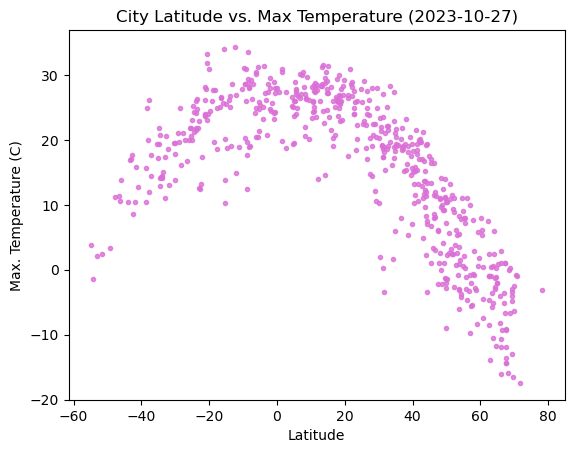

In [108]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    color="orchid",
    linewidths=1,
    marker=".",  
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature ({str(time.strftime('%Y-%m-%d'))})")  
plt.xlabel("Latitude")
plt.ylabel("Max. Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

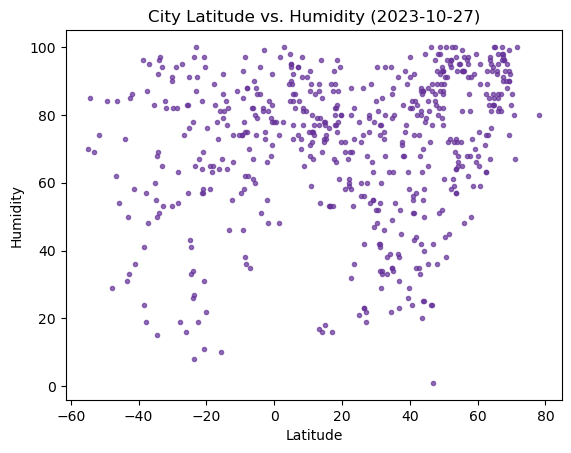

In [109]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    color="rebeccapurple",
    linewidths=1,
    marker=".",  
    alpha=0.7,
    label="Cities"
)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({str(time.strftime('%Y-%m-%d'))})") 
plt.xlabel("Latitude")
plt.ylabel("Humidity")


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

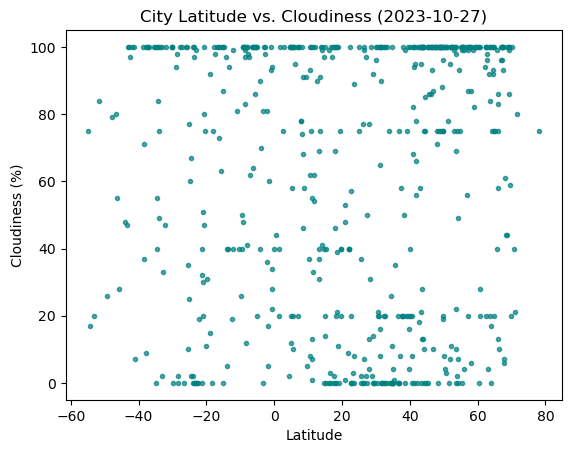

In [110]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    color="teal",
    linewidths=1,
    marker=".",  
    alpha=0.7,
    label="Cities"
)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({str(time.strftime('%Y-%m-%d'))})") 
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

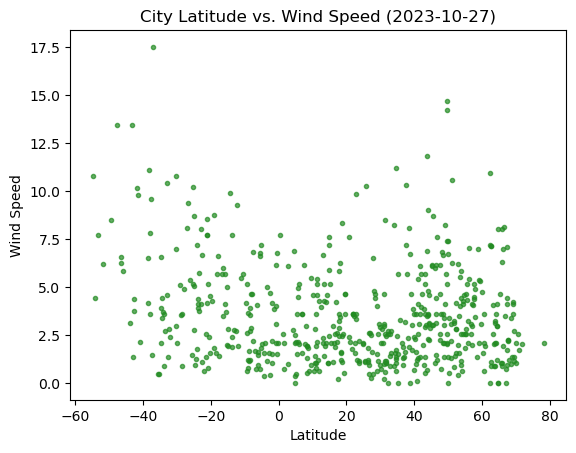

In [111]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    color="forestgreen",
    linewidths=1,
    marker=".",  
    alpha=0.7,
    label="Cities"
)
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({str(time.strftime('%Y-%m-%d'))})") 
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [112]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_value, y_value, title, text_coord):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    regress_values = x_value * slope + intercept
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    
    plt.scatter(x_value, y_value)
    plt.plot(x_value, regress_values, "r-")
    plt.annotate(line_eq, text_coord, fontsize=15, color="black")
    plt.xlabel("Latitude")
    plt.ylabel("Variable")
    print(f"The r-value is {rvalue ** 2}")
    plt.show()
                          

In [113]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,19.39,74,0,3.09,US,1698456461
1,albany,42.6001,-73.9662,19.70,74,18,2.00,US,1698456377
2,nishinoomote,30.7333,131.0000,21.31,52,20,2.06,JP,1698456462
3,himatnagar,23.6000,72.9500,22.27,36,8,2.18,IN,1698456463
5,st. john's,47.5649,-52.7093,6.10,84,100,2.57,CA,1698456465


In [114]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,adamstown,-25.0660,-130.1015,23.12,76,77,2.78,PN,1698456464
6,paracuru,-3.4100,-39.0306,27.28,82,0,5.00,BR,1698456466
7,port mathurin,-19.6833,63.4167,24.41,76,31,4.27,MU,1698456467
8,grytviken,-54.2811,-36.5092,-1.41,85,17,4.42,GS,1698456468
11,blackmans bay,-43.0167,147.3167,17.07,50,100,1.34,AU,1698456470


###  Temperature vs. Latitude Linear Regression Plot

The r-value is 0.7784571402831847


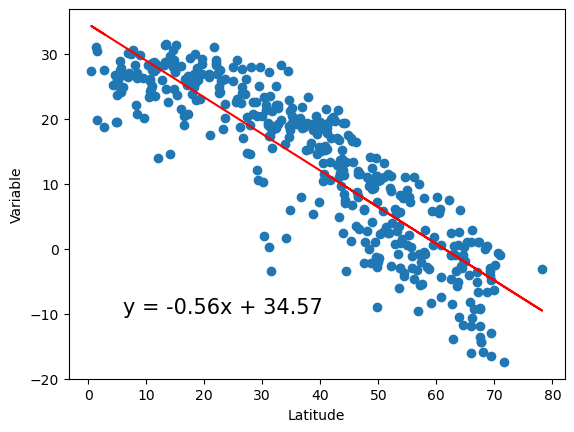

In [115]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (6,-10))

The r-value is 0.5155139346372403


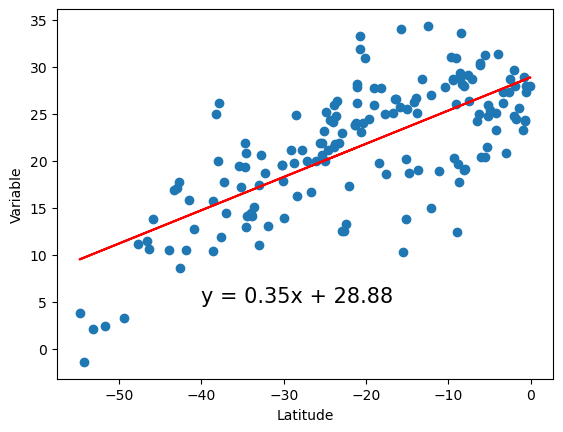

In [116]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-40,5))

**Discussion about the linear relationship:** The Northern and Southern Hemispheres experience different patterns of temperature variation. In the Northern Hemisphere, temperatures generally decrease as you move towards higher latitudes. This is supported by the negative slope of -0.56 in the linear equation, indicating a negative relationship between latitude and maximum temperature. In contrast, in the Southern Hemisphere, temperatures generally increase as latitude increases. The positive slope of +0.35 in the equation suggests a positive linear relationship between latitude and maximum temperature in the Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.02953438248839223


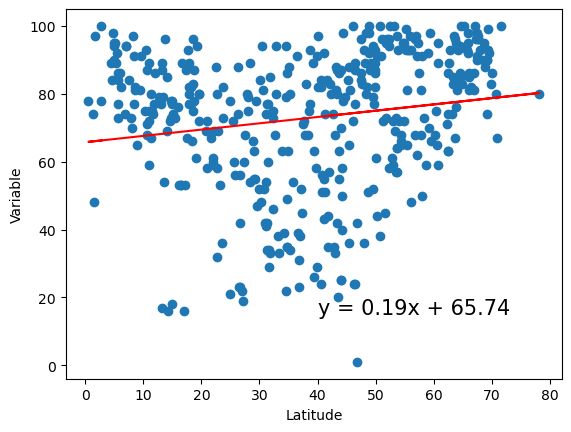

In [117]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (40,15))

The r-value is 0.028060029382563346


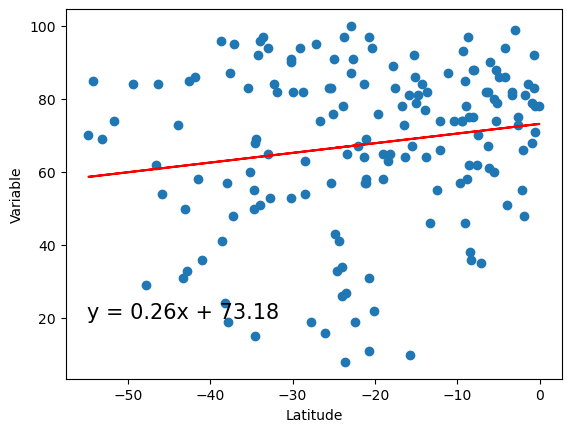

In [118]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-55,20))

**Discussion about the linear relationship:** In both the Northern and Southern Hemispheres, there is a positive linear relationship between latitude and humidity. As you move towards higher latitudes in either hemisphere, humidity levels tend to increase.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.0348362307121336


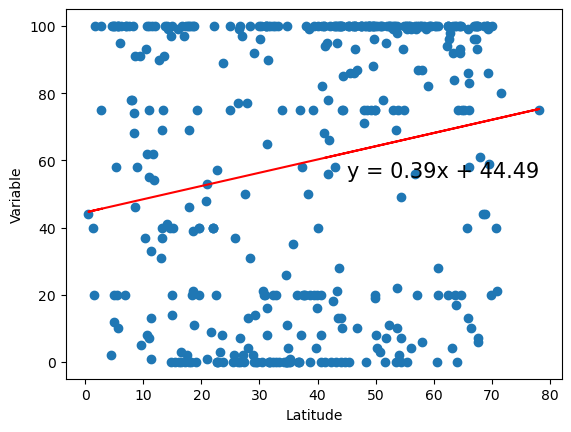

In [119]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (45,55))

The r-value is 0.004062340562615108


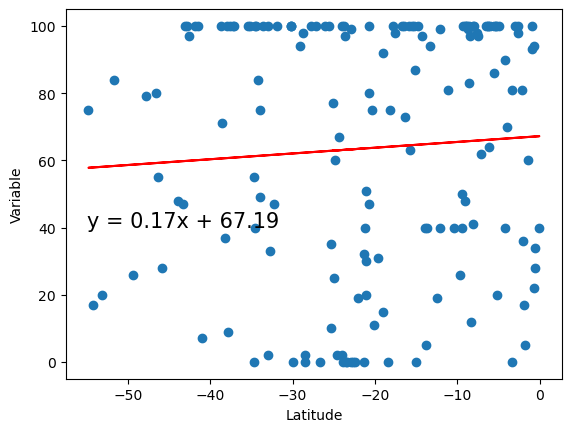

In [120]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-55,40))

**Discussion about the linear relationship:** In both the Northern and Southern Hemispheres, there is a positive linear relationship between latitude and cloudiness. As you move towards higher latitudes in either hemisphere, cloudiness levels tend to increase.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.007203261573614808


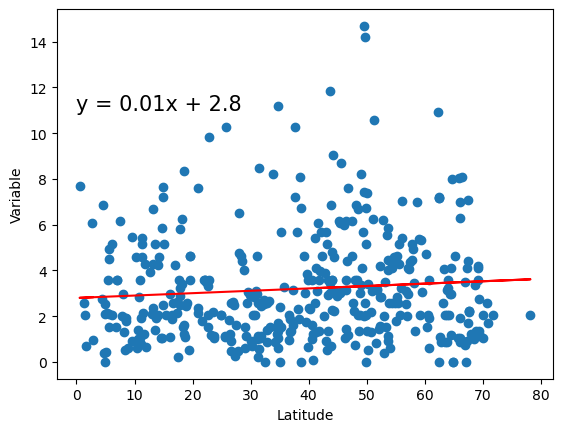

In [121]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (0,11))

The r-value is 0.14538410654623588


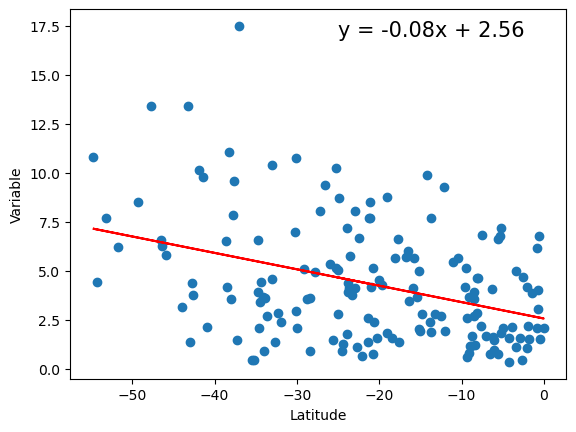

In [122]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (-25,17))

**Discussion about the linear relationship:** In both the Northern and Southern Hemispheres, there is a relatively weak linear relationship between latitude and wind speed. The direction of the relationship is opposite in the two hemispheres, but the slopes are quite small, indicating that latitude has only a modest impact on wind speed. 